
**Análise Exploratória de Dados (EDA) - Manutenção Preditiva**

Este script realiza uma análise completa do conjunto de dados 'bootcamp_train.csv',
seguindo as seguintes etapas:
1.  Limpeza e Preparação dos Dados:
    - Corrige nomes de colunas.
    - Trata valores anômalos (negativos) como ausentes.
    - Padroniza as colunas de falha para o formato binário (0/1).
2.  Análise de Valores Ausentes:
    - Identifica e quantifica a porcentagem de dados faltantes.
3.  Análise Univariada:
    - Gera estatísticas descritivas.
    - Visualiza a distribuição de cada sensor com histogramas e box plots.
4.  Análise Bivariada:
    - Calcula e visualiza a matriz de correlação entre os sensores.
    - Gera gráficos de dispersão e um pairplot para examinar relações.
5.  Análise da Variável Alvo:
    - Analisa o desbalanceamento das classes de falha.
    - Investiga a coocorrência de diferentes tipos de falha.


# 1.  Limpeza e Preparação dos Dados

In [ ]:

# 1. Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# --- Configurações de Visualização ---
# Define um estilo para os gráficos
sns.set_style("whitegrid")
# Define o tamanho padrão das figuras
plt.rcParams['figure.figsize'] = (12, 7)
# Cria um diretório para salvar as imagens geradas
if not os.path.exists('analise_exploratoria_plots'):
    os.makedirs('analise_exploratoria_plots')


In [ ]:
# --- 1. CARREGAMENTO E LIMPEZA DOS DADOS ---

# Carregar o dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp DS - Agosto 25/bootcamp_train.csv')
print("Dataset 'bootcamp_train.csv' carregado com sucesso.")

# Copiar o dataframe original para preservar os dados brutos
df_cleaned = df.copy()

Dataset 'bootcamp_train.csv' carregado com sucesso.


In [ ]:
df_cleaned.head()

,id,id_produto,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
0,0,L56434,L,298.3,309.1,90.0,1616.0,31.1,195.0,não,False,False,Não,False,Não
1,1,L48741,L,298.2,308.4,90.0,1388.0,53.8,137.0,Não,False,False,Não,False,Não
2,2,L48850,L,298.2,307.8,90.0,1528.0,31.1,NaN,Não,N,False,Não,False,Não
3,3,M20947,M,300.9,310.8,90.0,1599.0,33.0,7.0,não,False,False,Não,False,não
4,4,L53849,L,-36.0,310.5,90.0,1571.0,33.9,NaN,não,N,False,não,False,Não


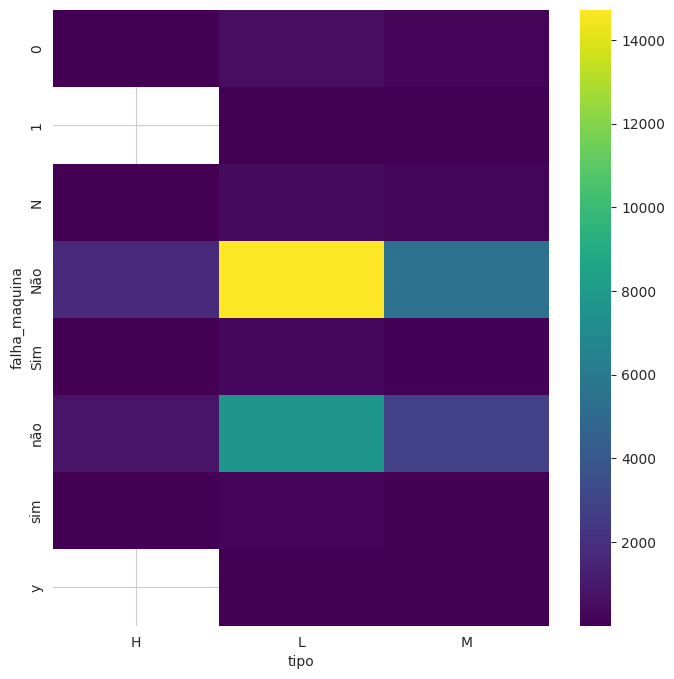

In [ ]:
# @title tipo vs falha_maquina

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['falha_maquina'].value_counts()
    for x_label, grp in df_cleaned.groupby('tipo')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo')
_ = plt.ylabel('falha_maquina')

In [ ]:
print(df_cleaned.isnull().sum())

id                                   0
id_produto                           0
tipo                                 0
temperatura_ar                     616
temperatura_processo               599
umidade_relativa                     0
velocidade_rotacional              751
torque                             623
desgaste_da_ferramenta             952
falha_maquina                        0
FDF (Falha Desgaste Ferramenta)      0
FDC (Falha Dissipacao Calor)         0
FP (Falha Potencia)                  0
FTE (Falha Tensao Excessiva)         0
FA (Falha Aleatoria)                 0
dtype: int64


In [ ]:
# Padronizar nomes das colunas (remove espaços, parênteses e caracteres especiais)
df_cleaned.columns = [
    col.strip()
    .lower()
    .replace(' ', '_')
    .replace('(', '')
    .replace(')', '')
    for col in df_cleaned.columns
]


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35260 entries, 0 to 35259
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             35260 non-null  int64  
 1   id_produto                     35260 non-null  object 
 2   tipo                           35260 non-null  object 
 3   temperatura_ar                 34644 non-null  float64
 4   temperatura_processo           34661 non-null  float64
 5   umidade_relativa               35260 non-null  float64
 6   velocidade_rotacional          34509 non-null  float64
 7   torque                         34637 non-null  float64
 8   desgaste_da_ferramenta         34308 non-null  float64
 9   falha_maquina                  35260 non-null  object 
 10  fdf_falha_desgaste_ferramenta  35260 non-null  object 
 11  fdc_falha_dissipacao_calor     35260 non-null  object 
 12  fp_falha_potencia              35260 non-null 

In [ ]:
# --- Transformação de Dados: Kelvin para Celsius ---
print("\nTransformação de Temperatura (Kelvin para Celsius) ---")
# A conversão melhora a interpretabilidade dos dados
df_cleaned['temperatura_ar_celsius'] = df_cleaned['temperatura_ar'] - 273.15
df_cleaned['temperatura_processo_celsius'] = df_cleaned['temperatura_processo'] - 273.15


Transformação de Temperatura (Kelvin para Celsius) ---


# 2.  Análise de Valores Ausentes

In [ ]:
# --- 2. IDENTIFICAÇÃO DE VALORES AUSENTES ---

print("\nIniciando a Etapa 2: Análise de Valores Ausentes...")

# Calcular a contagem e a porcentagem de valores ausentes
missing_values = df_cleaned.isnull().sum()
missing_percentage = (missing_values / len(df_cleaned)) * 100
missing_info = pd.DataFrame({
    'Contagem Ausente': missing_values,
    'Porcentagem Ausente (%)': missing_percentage
})

# Exibir apenas colunas com valores ausentes
print("Resumo de Valores Ausentes :")
print(missing_info[missing_info['Contagem Ausente'] > 0].sort_values(by='Contagem Ausente', ascending=False))
print("-" * 50)
# Comentário objetivo sobre os valores ausentes:
print("\nComentário: As quatros colunas acima apresentam valores ausentes, com porcentagens relativamente baixas (abaixo de 3%).")
print("-" * 50)


Iniciando a Etapa 2: Análise de Valores Ausentes...
Resumo de Valores Ausentes :
                        Contagem Ausente  Porcentagem Ausente (%)
desgaste_da_ferramenta               952                 2.699943
velocidade_rotacional                751                 2.129892
torque                               623                 1.766875
temperatura_ar                       616                 1.747022
temperatura_processo                 599                 1.698809
--------------------------------------------------

Comentário: As quatros colunas acima apresentam valores ausentes, com porcentagens relativamente baixas (abaixo de 3%).
--------------------------------------------------


# 3.  Análise Univariada

In [ ]:
# --- 3. ANÁLISE UNIVARIADA ---

print("\nIniciando a Etapa 3: Análise Univariada das Variáveis de Sensor...")

# Selecionar as colunas numéricas dos sensores
sensor_cols = [
    'temperatura_ar_celsius', 'temperatura_processo_celsius', 'velocidade_rotacional',
    'torque', 'desgaste_da_ferramenta'
]

# Exibir estatísticas descritivas
print("Estatísticas Descritivas dos Sensores:")
print(df_cleaned[sensor_cols].describe())
print("-" * 50)
# Análise conclusiva objetiva das estatísticas descritivas
print("\nAnálise Conclusiva das Estatísticas Descritivas:")
print("- As temperaturas do ar e do processo (em Celsius) mostram valores mínimos anômalos (negativos), que precisam ser tratados.")
print("- A velocidade rotacional e o torque apresentam uma ampla faixa de valores, com o torque tendo um valor mínimo anômalo (negativo).")
print("- O desgaste da ferramenta tem um valor mínimo anômalo (negativo) e uma distribuição assimétrica, com a maioria dos valores concentrados em níveis mais baixos.")
print("-" * 50)


Iniciando a Etapa 3: Análise Univariada das Variáveis de Sensor...
Estatísticas Descritivas dos Sensores:
       temperatura_ar_celsius  temperatura_processo_celsius  \
count            34644.000000                  34661.000000   
mean                -3.614759                      7.307676   
std                 96.342224                     96.943630   
min               -309.150000                   -311.150000   
25%                 24.750000                     35.350000   
50%                 26.450000                     36.650000   
75%                 27.950000                     37.750000   
max                 31.350000                     40.650000   

       velocidade_rotacional        torque  desgaste_da_ferramenta  
count           34509.000000  34637.000000            34308.000000  
mean             1380.194181     40.210357               74.373266  
std               494.098759      8.831626              110.411937  
min              -161.000000      3.800000       

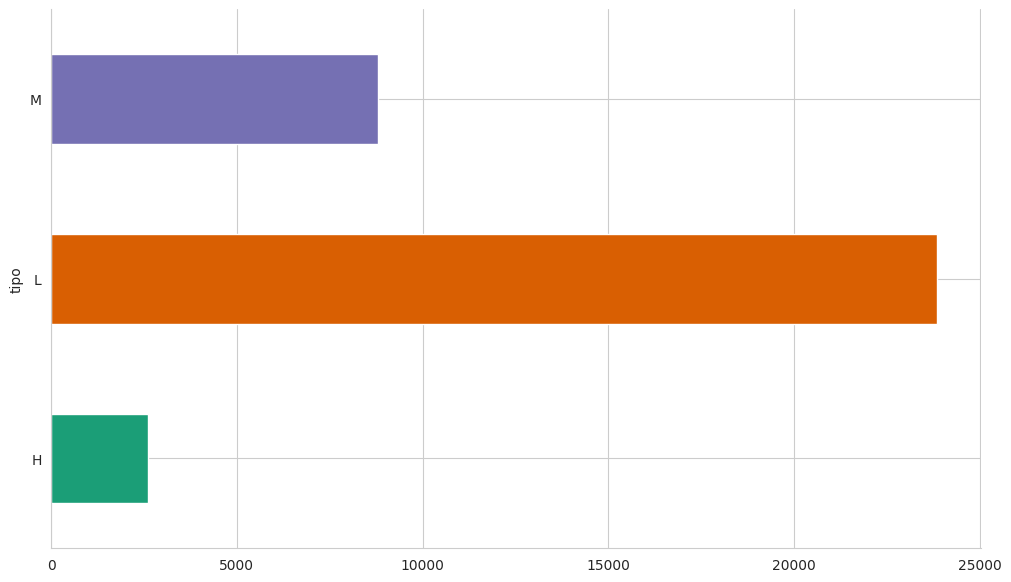

In [ ]:
# @title tipo

from matplotlib import pyplot as plt
import seaborn as sns
df_cleaned.groupby('tipo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

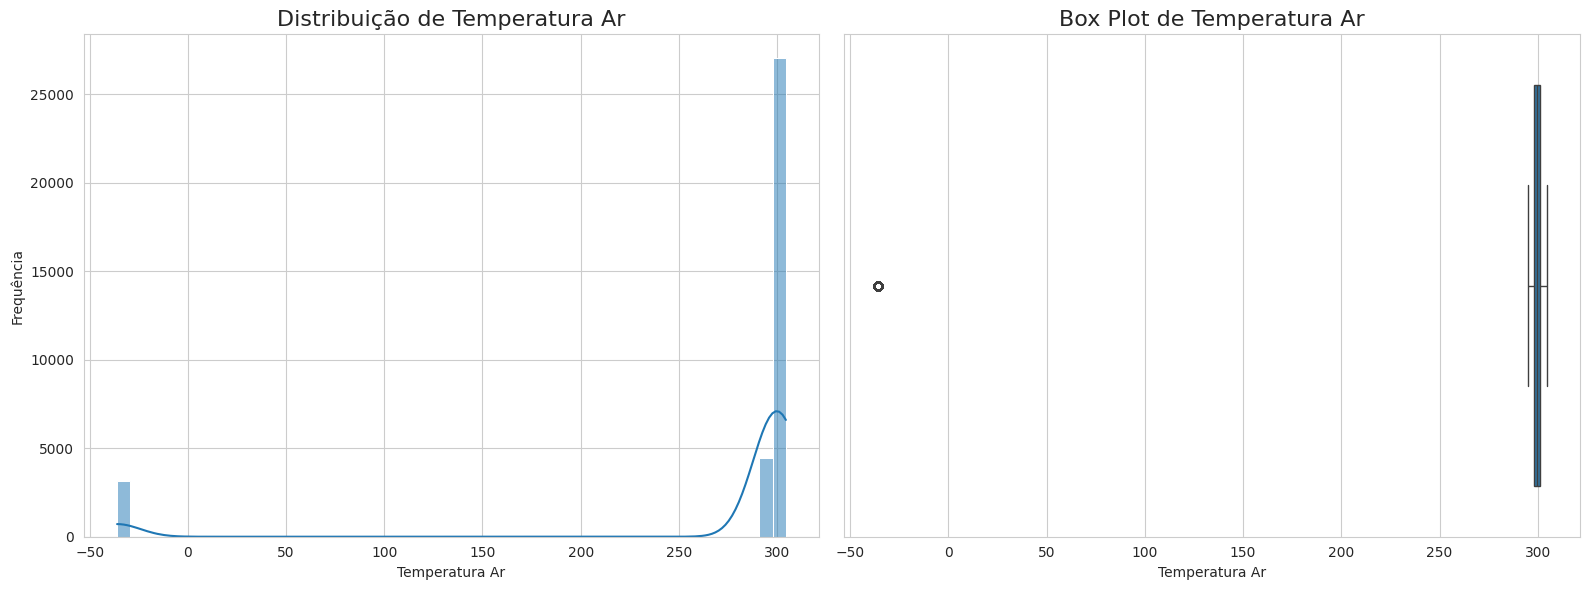

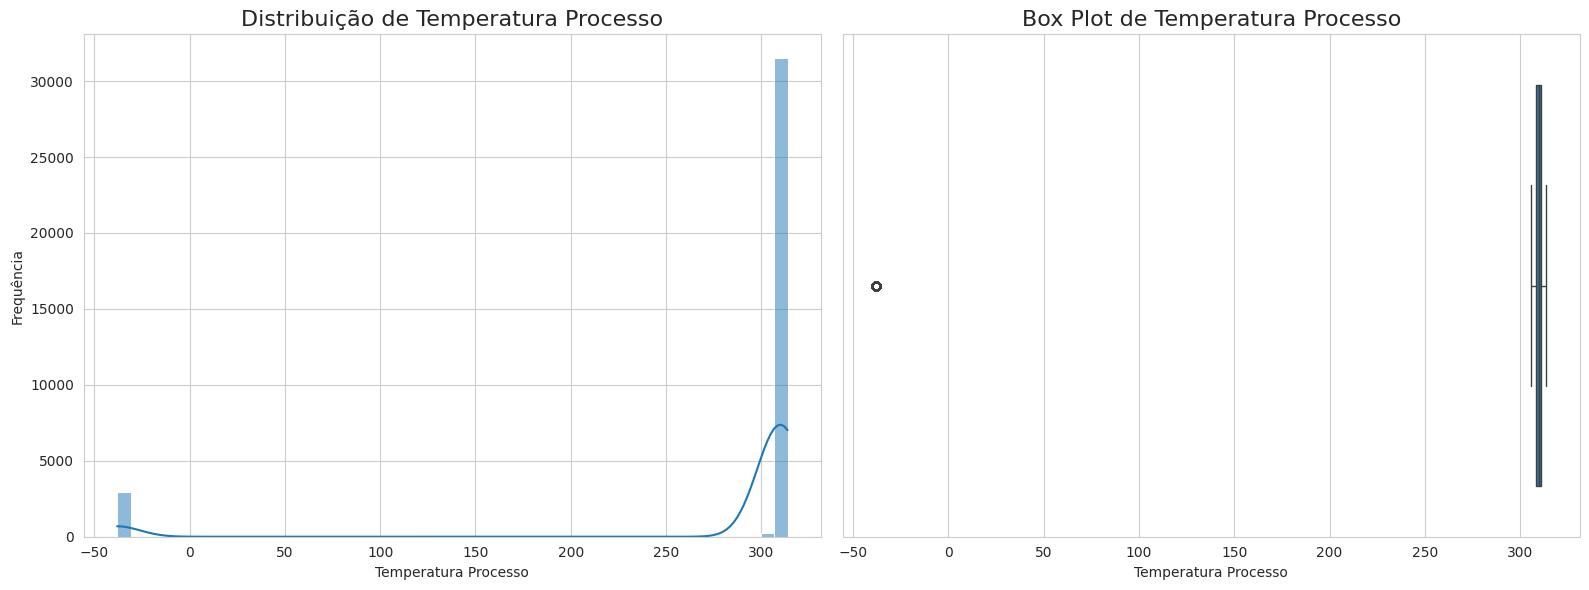

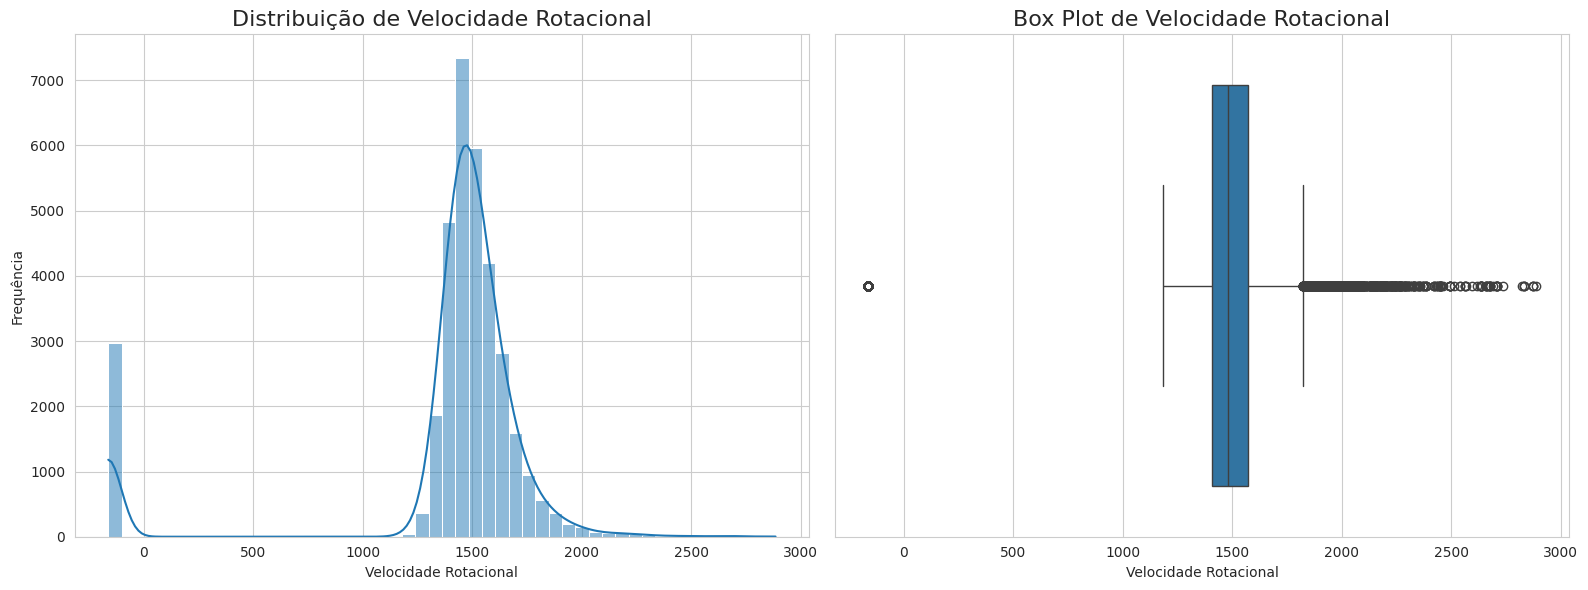

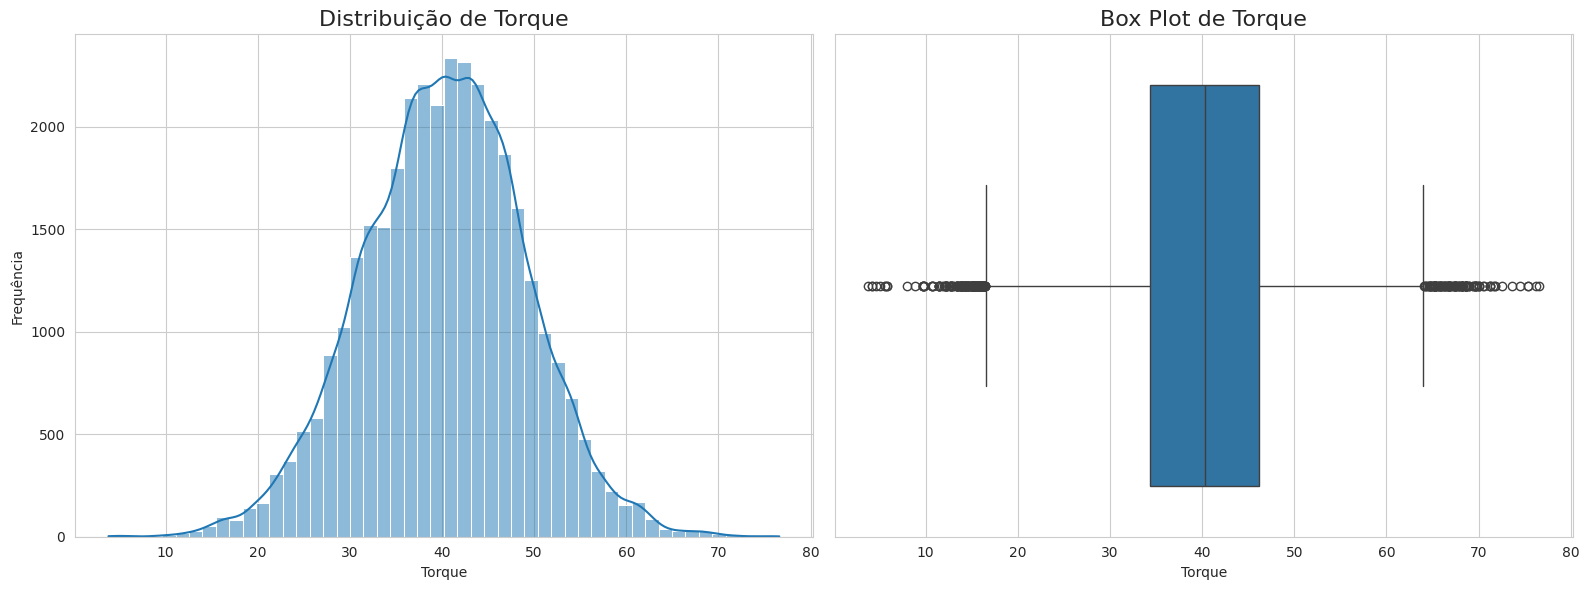

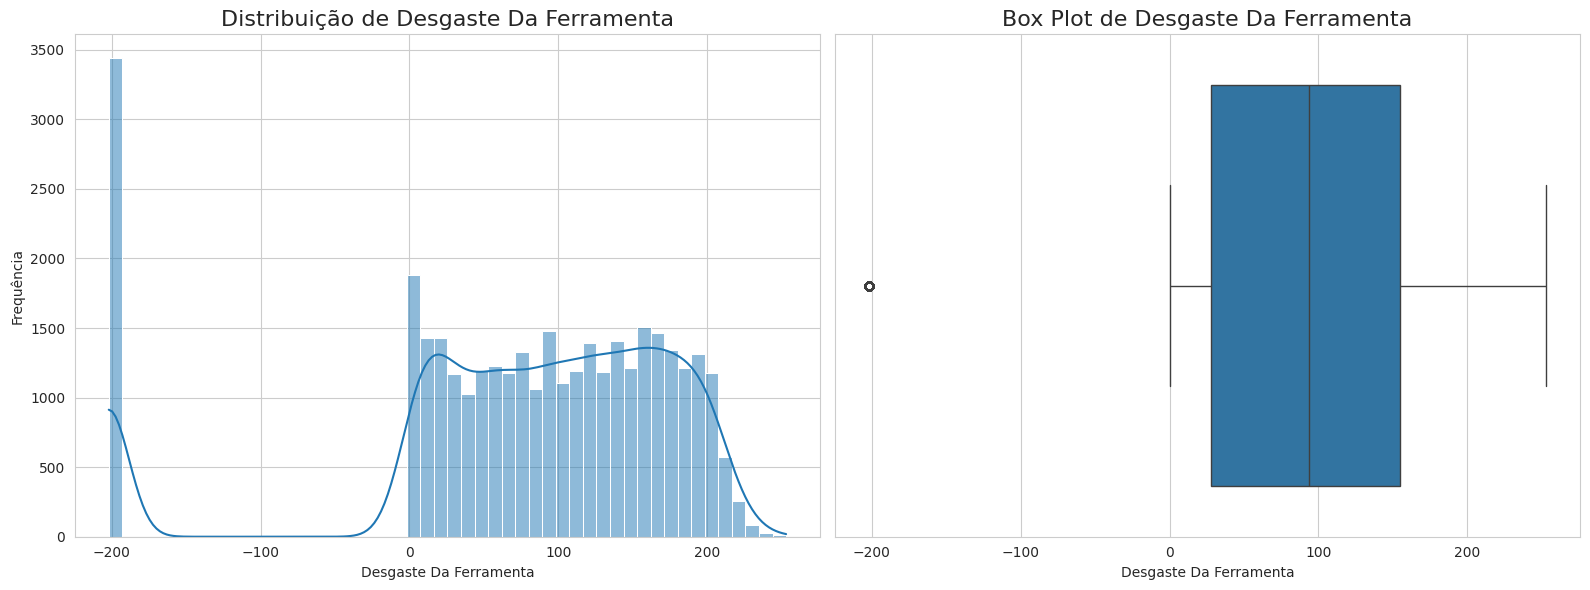


Comentário: A análise univariada revela a distribuição de cada variável.
- 'Torque' e 'Velocidade Rotacional' possuem distribuições que se aproximam da normalidade, mas com caudas indicando outliers.
- 'Desgaste da Ferramenta' é fortemente assimétrico à direita, o que é esperado, pois a maioria das ferramentas tem pouco desgaste.
--------------------------------------------------


In [ ]:
# histogramas e box plots para cada sensor
for col in sensor_cols:
    plt.figure(figsize=(16, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[col], kde=True, bins=50)
    plt.title(f'Distribuição de {col.replace("_", " ").title()}', fontsize=16)
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequência')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box Plot de {col.replace("_", " ").title()}', fontsize=16)
    plt.xlabel(col.replace("_", " ").title())

    plt.tight_layout()
    # Salvar a figura
    # plot_filename = f"analise_exploratoria_plots/univariada_{col}.png"
    # plt.savefig(plot_filename)
    # print(f"Gráfico salvo em: {plot_filename}")
    plt.show()
    # plt.close()

print("\nComentário: A análise univariada revela a distribuição de cada variável.")
print("- 'Torque' e 'Velocidade Rotacional' possuem distribuições que se aproximam da normalidade, mas com caudas indicando outliers.")
print("- 'Desgaste da Ferramenta' é fortemente assimétrico à direita, o que é esperado, pois a maioria das ferramentas tem pouco desgaste.")
print("-" * 50)

# 4.  Análise Bivariada


Iniciando a Etapa 4: Análise Bivariada...


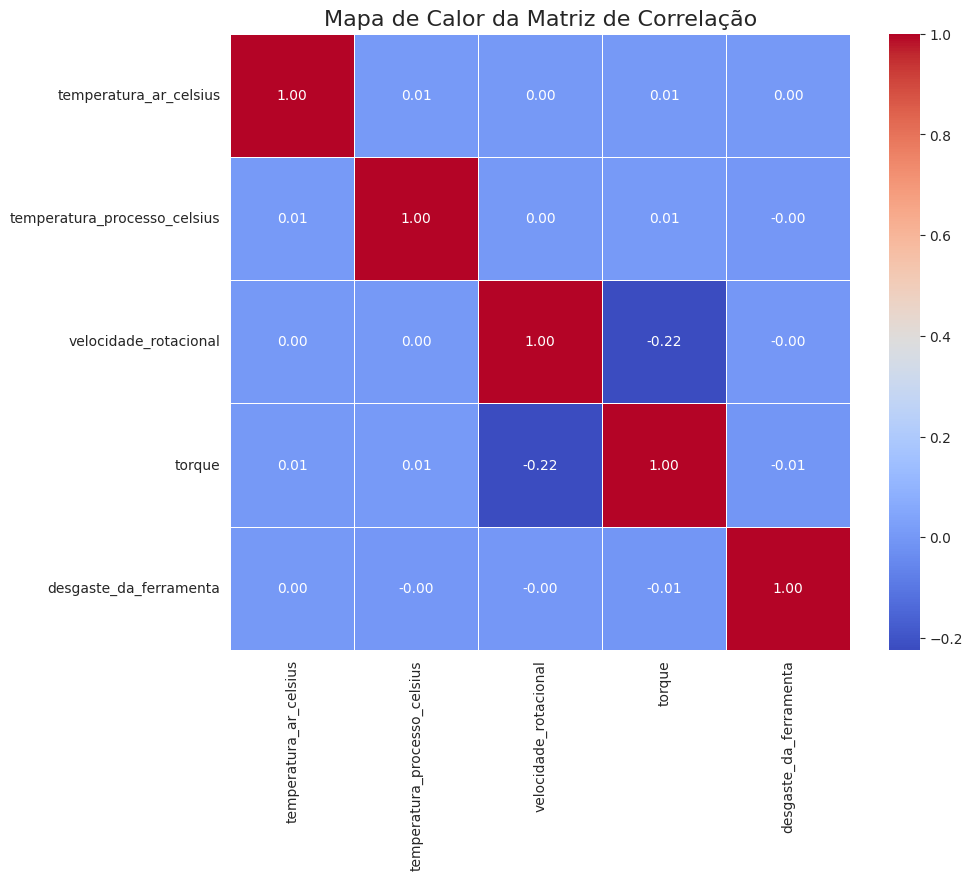


Matriz de Correlação:
                              temperatura_ar_celsius  \
temperatura_ar_celsius                      1.000000   
temperatura_processo_celsius                0.007787   
velocidade_rotacional                       0.001290   
torque                                      0.005694   
desgaste_da_ferramenta                      0.001657   

                              temperatura_processo_celsius  \
temperatura_ar_celsius                            0.007787   
temperatura_processo_celsius                      1.000000   
velocidade_rotacional                             0.003256   
torque                                            0.010330   
desgaste_da_ferramenta                           -0.001275   

                              velocidade_rotacional    torque  \
temperatura_ar_celsius                     0.001290  0.005694   
temperatura_processo_celsius               0.003256  0.010330   
velocidade_rotacional                      1.000000 -0.223645   
torque 

In [ ]:
# --- 4. ANÁLISE BIVARIADA ---

print("\nIniciando a Etapa 4: Análise Bivariada...")

# Calcular a matriz de correlação
correlation_matrix = df_cleaned[sensor_cols].corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação', fontsize=16)
# plot_filename = "/content/drive/MyDrive/Colab Notebooks/Bootcamp DS - Agosto 25/analise_exploratoria_plots/bivariada_matriz_correlacao.png"
# plt.savefig(plot_filename)
# print(f"Gráfico salvo em: {plot_filename}")
#plt.close()
plt.show()

print("\nMatriz de Correlação:")
print(correlation_matrix)
print("-" * 50)
print("- O sistema apresenta variáveis predominantemente independentes, com exceção da relação inversa entre velocidade e torque, oferecendo boa flexibilidade para controle e modelagem..")
print("- Velocidade Rotacional vs Torque (-0.224): Esta é a correlação mais significativa da matriz, indicando uma relação inversa moderada. Isso sugere que: Quando a velocidade rotacional aumenta, o torque tende a diminuir.Esta relação é fisicamente coerente em sistemas mecânicos")
print("- Em resumo: Independência entre variáveis. Ausência de multicolinearidade e Comportamento individual: Cada variável contribui de forma única para o sistema")
print("-" * 50)

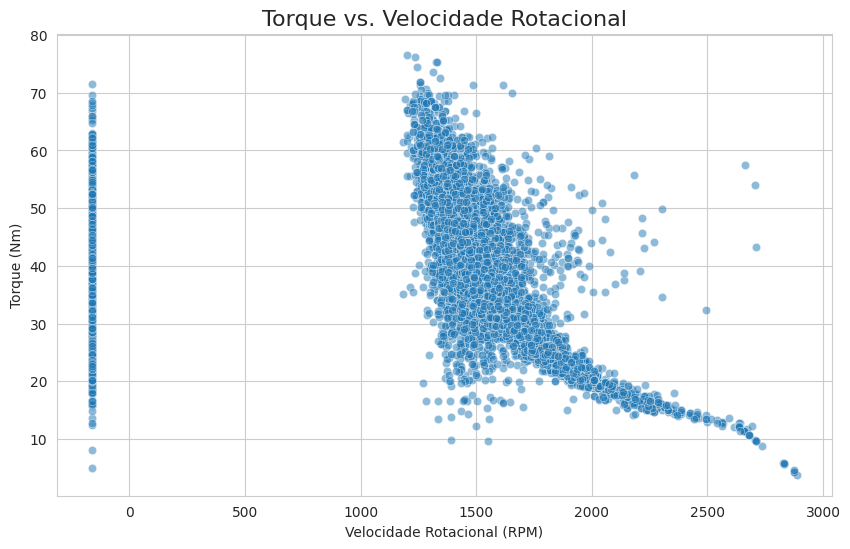

--------------------------------------------------
- O scatter plot que mostra uma distribuição hiperbólica típica de sistemas mecânicos onde o aumento da velocidade resulta em diminuição do torque.
--------------------------------------------------


In [ ]:

# Gráfico de Dispersão (Scatter Plot) para as variáveis mais correlacionadas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='velocidade_rotacional', y='torque', alpha=0.5)
plt.title('Torque vs. Velocidade Rotacional', fontsize=16)
plt.xlabel('Velocidade Rotacional (RPM)')
plt.ylabel('Torque (Nm)')
# plot_filename = "/content/drive/MyDrive/Colab Notebooks/Bootcamp DS - Agosto 25/analise_exploratoria_plots/bivariada_scatter_torque_velocidade.png"
# plt.savefig(plot_filename)
# print(f"Gráfico salvo em: {plot_filename}")
#plt.close()
plt.show()

print("-" * 50)
print("- O scatter plot que mostra uma distribuição hiperbólica típica de sistemas mecânicos onde o aumento da velocidade resulta em diminuição do torque.")
print("-" * 50)


Gerando o Gráfico de Pares (Pair Plot)... Isso pode levar alguns segundos.


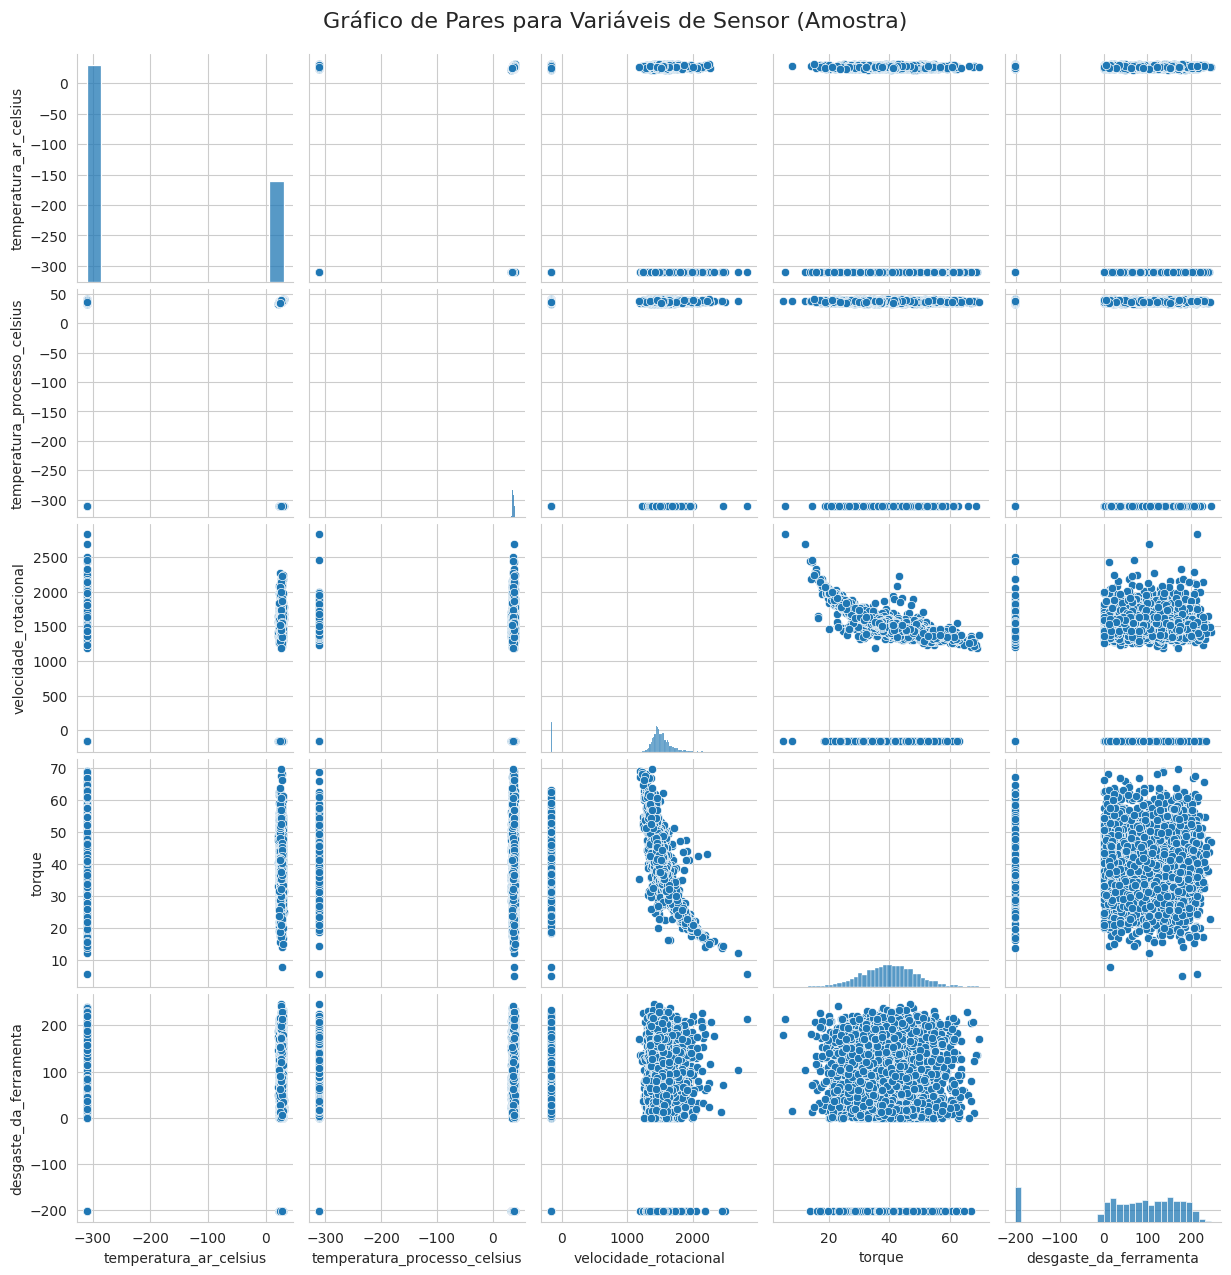

In [ ]:

# Gráfico de Pares (Pair Plot) - pode ser computacionalmente intensivo
# Para datasets muito grandes, é comum usar uma amostra dos dados
print("\nGerando o Gráfico de Pares (Pair Plot)... Isso pode levar alguns segundos.")
# Usando uma amostra de 5000 pontos para agilizar a plotagem
sample_df = df_cleaned.sample(n=5000, random_state=42)
pair_plot = sns.pairplot(sample_df[sensor_cols])
pair_plot.fig.suptitle('Gráfico de Pares para Variáveis de Sensor (Amostra)', y=1.02, fontsize=16)
# plot_filename = "/content/drive/MyDrive/Colab Notebooks/Bootcamp DS - Agosto 25/analise_exploratoria_plots/bivariada_pairplot.png"
# plt.savefig(plot_filename)
# print(f"Gráfico salvo em: {plot_filename}")
##plt.close()
plt.show()

 **Comentário análise Bivariada**

 A análise do gráfico de pares confirma que todas as variáveis apresentam correlações fracas (< 0.3), incluindo a relação velocidade rotacional vs torque (-0.22), que apesar de ser a mais forte do conjunto, ainda é considerada fraca pela classificação estatística. As distribuições mostram que as variáveis operam de forma essencialmente independente, com as temperaturas em faixas distintas sem correlação significativa, e o desgaste da ferramenta distribuindo-se aleatoriamente, indicando um sistema com variáveis desacopladas que permite controle independente de todos os parâmetros, mesmo considerando a leve tendência inversa entre velocidade e torque que, embora fisicamente esperada, não representa uma dependência estatisticamente forte.

# 5.  Análise da Variável Alvo

In [ ]:
# --- 5. ANÁLISE DA VARIÁVEL ALVO ---

print("\nIniciando a Etapa 5: Análise da Variável Alvo (Dados Brutos)...")

failure_cols = [
    'falha_maquina', 'fdf_falha_desgaste_ferramenta', 'fdc_falha_dissipacao_calor',
    'fp_falha_potencia', 'fte_falha_tensao_excessiva', 'fa_falha_aleatoria'
]

print("Distribuição dos valores nas colunas de falha (dados brutos):")
for col in failure_cols:
    print(f"\nColuna: {col}")
    print(df_cleaned[col].value_counts(dropna=False)) # Include NaN counts if any

print("\nComentário: Os resultados acima mostram os diferentes valores presentes em cada coluna de falha antes da padronização. É visível a inconsistência nos formatos ('sim', 'Sim', 'não', 'Não', True, False, etc.) e a presença de valores como 'N', '-', '0', '1', 'nao'.")
print("-" * 50)


Iniciando a Etapa 5: Análise da Variável Alvo (Dados Brutos)...
Distribuição dos valores nas colunas de falha (dados brutos):

Coluna: falha_maquina
falha_maquina
Não    21926
não    11303
N        691
0        678
Sim      420
sim      217
y         13
1         12
Name: count, dtype: int64

Coluna: fdf_falha_desgaste_ferramenta
fdf_falha_desgaste_ferramenta
False    33729
N          702
0          688
True        70
-           70
1            1
Name: count, dtype: int64

Coluna: fdc_falha_dissipacao_calor
fdc_falha_dissipacao_calor
False    33649
nao        700
0          686
True       217
y            4
1            4
Name: count, dtype: int64

Coluna: fp_falha_potencia
fp_falha_potencia
Não    22282
não    11462
N        702
0        688
Sim       81
sim       41
1          2
y          2
Name: count, dtype: int64

Coluna: fte_falha_tensao_excessiva
fte_falha_tensao_excessiva
False    35090
True       170
Name: count, dtype: int64

Coluna: fa_falha_aleatoria
fa_falha_aleatoria
N

# **6. Tratamento dos dados**
1. Anomalias.
2. Padronizacao das falhas.

In [ ]:
# --- 6. Detecção e Tratamento de Outliers (Método IQR) ---
print("\n--- Etapa 6: Detecção e Tratamento de Outliers ---")
# Definir as colunas numéricas a serem analisadas para outliers
# Incluindo as novas colunas de temperatura
numerical_cols = [
    'umidade_relativa',
    'velocidade_rotacional',
    'torque',
    'desgaste_da_ferramenta',
    'temperatura_ar_celsius',
    'temperatura_processo_celsius'
]

print(f"Analisando outliers nas colunas: {', '.join(numerical_cols)}")

for col in numerical_cols:
    # Ignora colunas que possam ter todos os valores ausentes
    if df_cleaned[col].isnull().all():
        continue

    # Calcula Q1, Q3 e IQR
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define os limites para detecção de outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifica o número de outliers
    outliers_count = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)].shape[0]
    print(f"- Coluna '{col}': {outliers_count} outliers detectados.")

    # Substitui outliers por NaN (nulo)
    df_cleaned.loc[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), col] = np.nan


# Calcular a contagem e a porcentagem de valores ausentes
missing_values = df_cleaned.isnull().sum()
missing_percentage = (missing_values / len(df_cleaned)) * 100
missing_info = pd.DataFrame({
    'Contagem Ausente': missing_values,
    'Porcentagem Ausente (%)': missing_percentage
})

# Exibir apenas colunas com valores ausentes
print("Contagem de valores ausentes após tratamento de outliers :")
print(missing_info[missing_info['Contagem Ausente'] > 0].sort_values(by='Contagem Ausente', ascending=False))



--- Etapa 6: Detecção e Tratamento de Outliers ---
Analisando outliers nas colunas: umidade_relativa, velocidade_rotacional, torque, desgaste_da_ferramenta, temperatura_ar_celsius, temperatura_processo_celsius
- Coluna 'umidade_relativa': 35 outliers detectados.
- Coluna 'velocidade_rotacional': 1213 outliers detectados.
- Coluna 'torque': 291 outliers detectados.
- Coluna 'desgaste_da_ferramenta': 0 outliers detectados.
- Coluna 'temperatura_ar_celsius': 3132 outliers detectados.
- Coluna 'temperatura_processo_celsius': 2939 outliers detectados.
Contagem de valores ausentes após tratamento de outliers :
                              Contagem Ausente  Porcentagem Ausente (%)
velocidade_rotacional                     4932                13.987521
desgaste_da_ferramenta                    4391                12.453205
temperatura_ar                            3748                10.629609
temperatura_ar_celsius                    3748                10.629609
temperatura_processo       

In [ ]:
# Estatísticas descritivas
print("Estatísticas Descritivas dos Sensores:")
print(df_cleaned[sensor_cols].describe())

Estatísticas Descritivas dos Sensores:
       temperatura_ar_celsius  temperatura_processo_celsius  \
count            31512.000000                  31722.000000   
mean                26.752605                     36.812345   
std                  1.892112                      1.405511   
min                 22.150000                     32.550000   
25%                 25.150000                     35.650000   
50%                 26.850000                     36.850000   
75%                 28.150000                     37.850000   
max                 31.350000                     40.650000   

       velocidade_rotacional        torque  desgaste_da_ferramenta  
count           30328.000000  34346.000000            30869.000000  
mean             1506.195661     40.242600              105.162979  
std               111.707289      8.513352               63.962523  
min              1192.000000     16.500000                0.000000  
25%              1429.000000     34.400000      

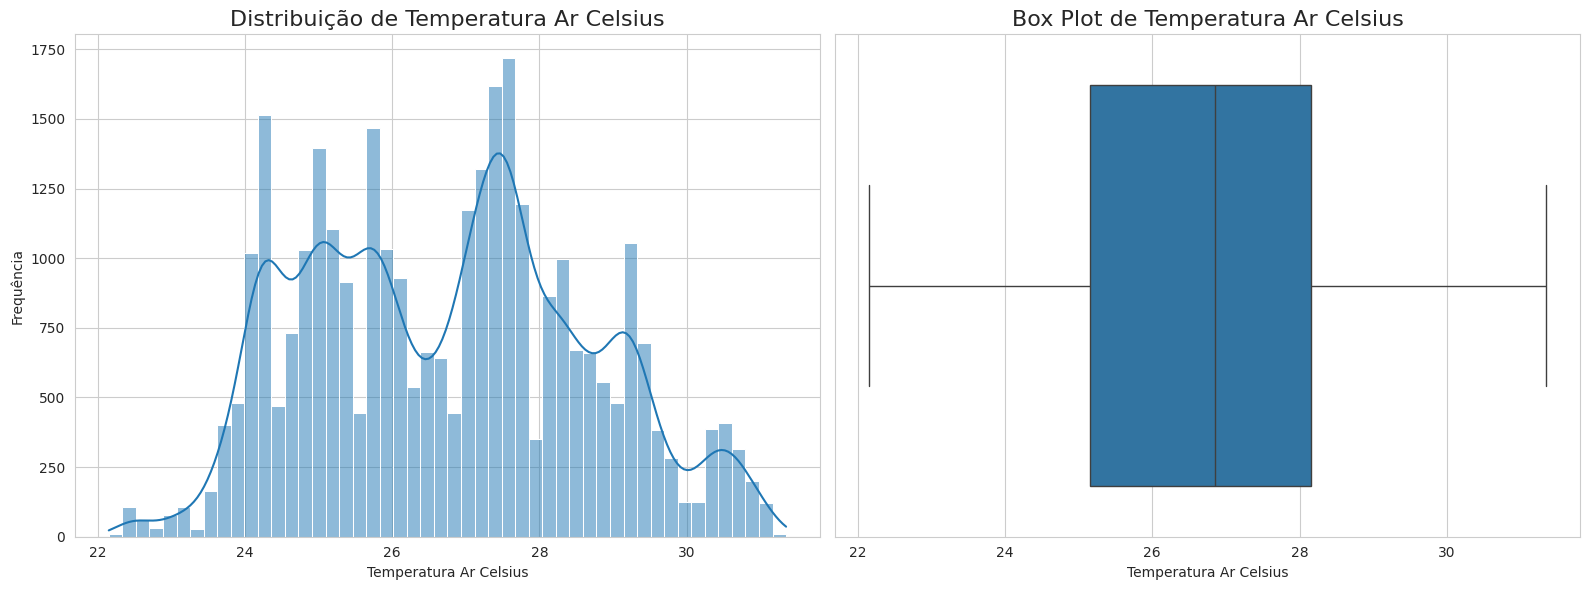

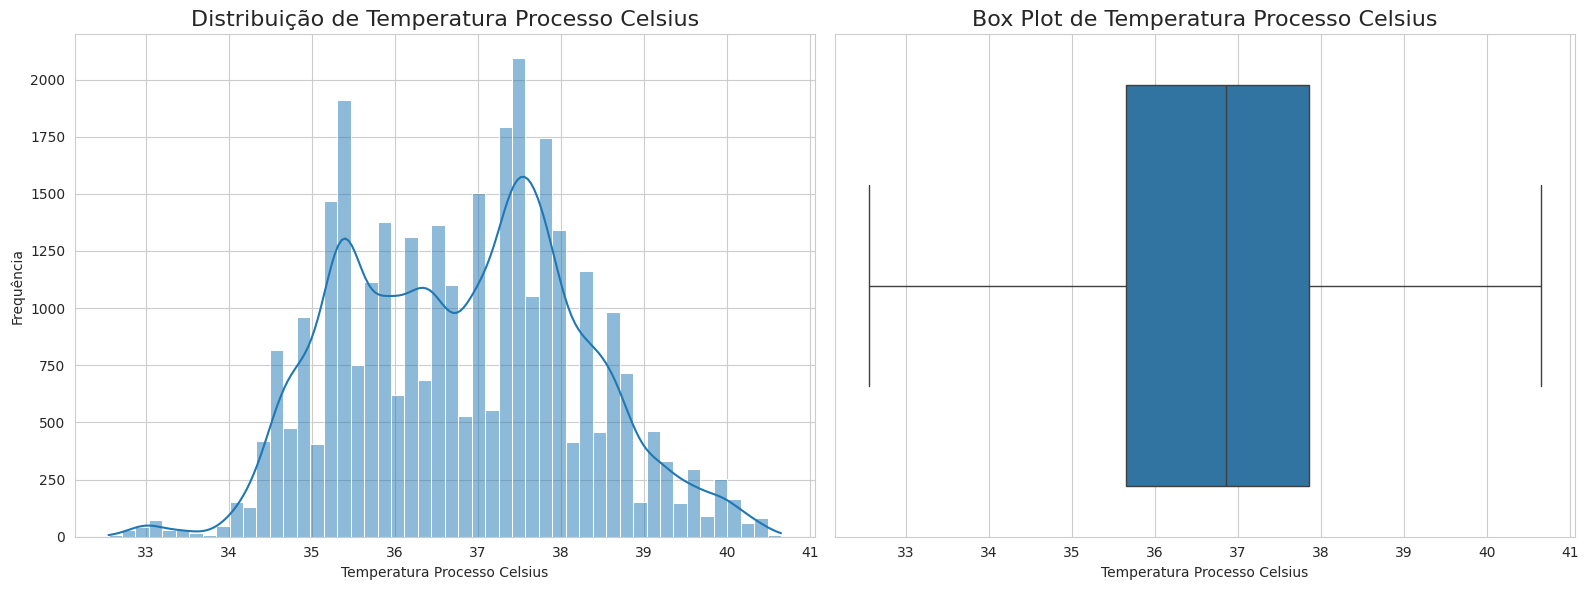

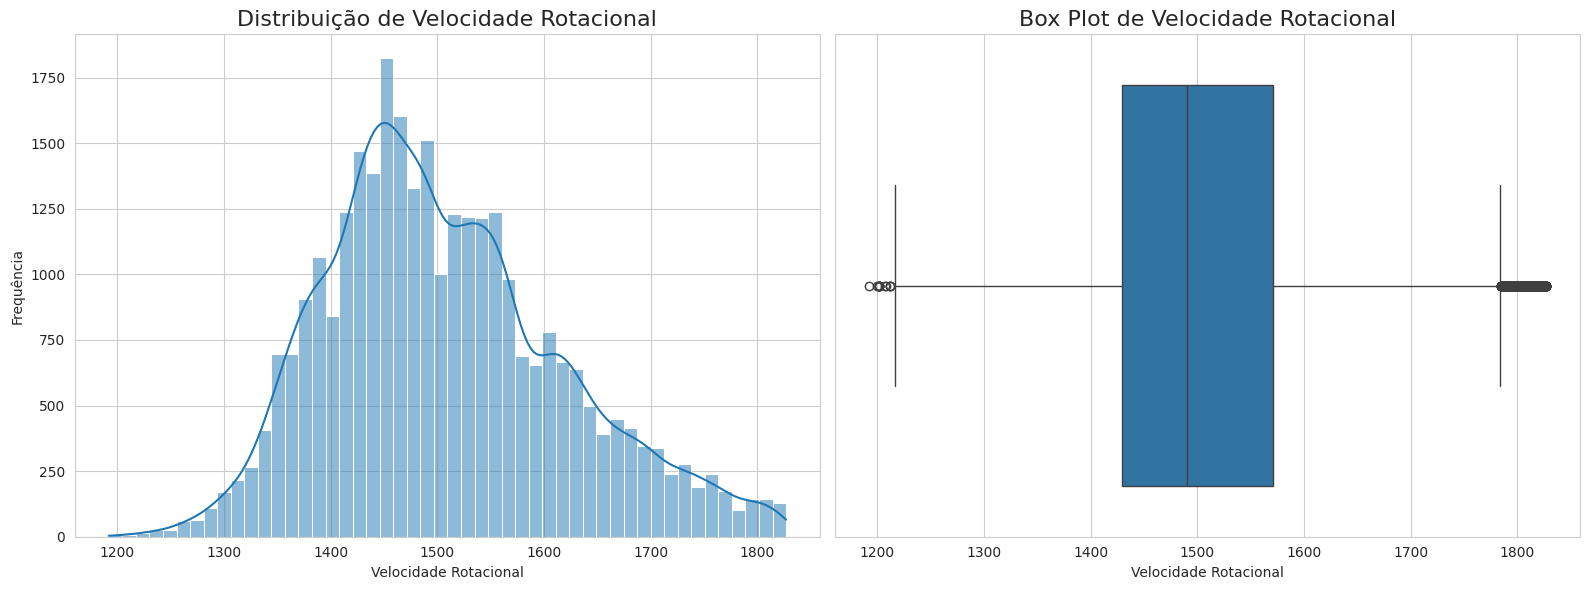

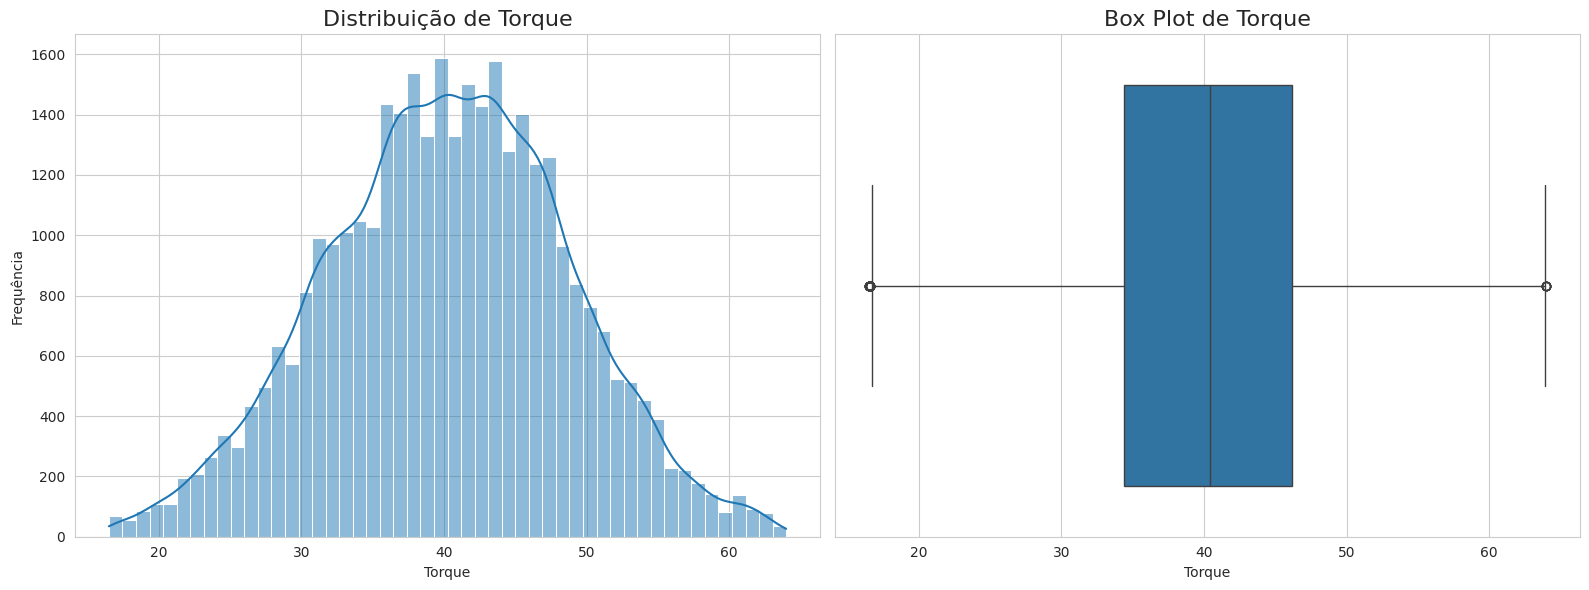

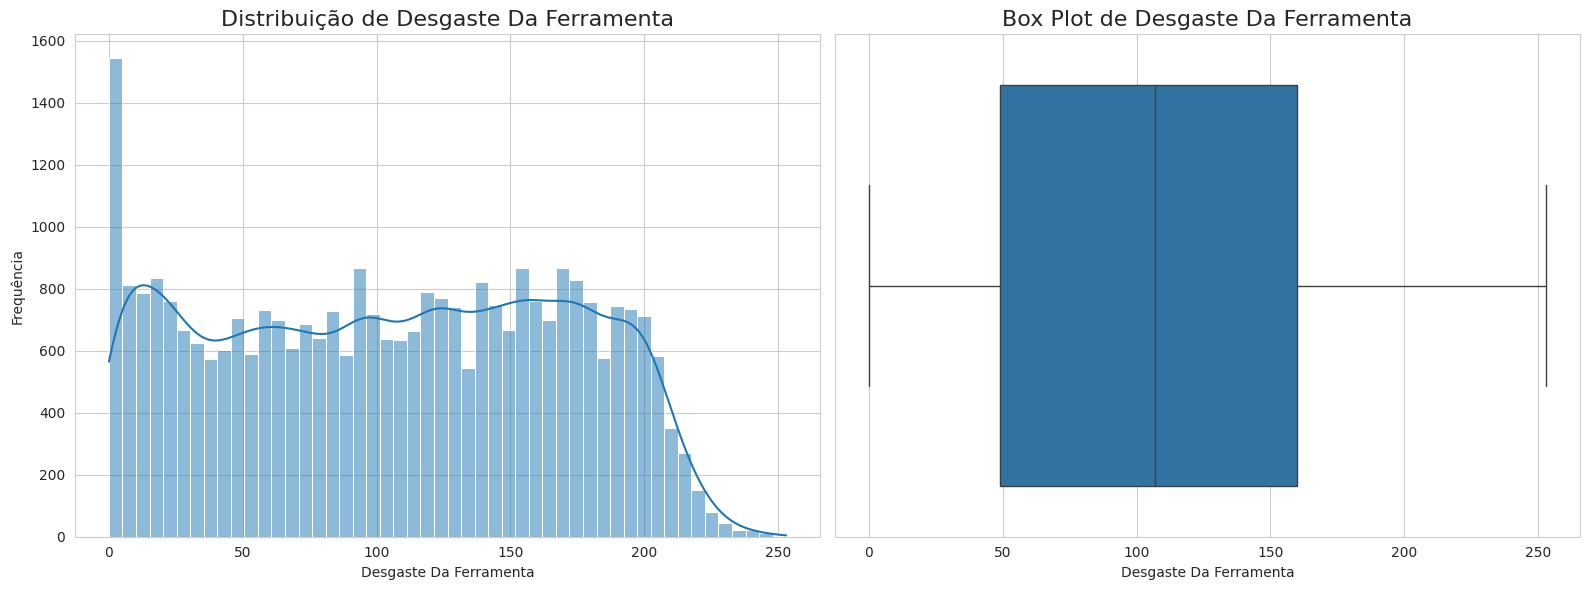

In [ ]:
# histogramas e box plots para cada sensor
for col in sensor_cols:
    plt.figure(figsize=(16, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[col], kde=True, bins=50)
    plt.title(f'Distribuição de {col.replace("_", " ").title()}', fontsize=16)
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequência')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box Plot de {col.replace("_", " ").title()}', fontsize=16)
    plt.xlabel(col.replace("_", " ").title())

    plt.tight_layout()
    # Salvar a figura
    # plot_filename = f"analise_exploratoria_plots/univariada_{col}.png"
    # plt.savefig(plot_filename)
    # print(f"Gráfico salvo em: {plot_filename}")
    plt.show()
    # plt.close()

**Comportamento Após Tratamento**

O tratamento de outliers e valores negativos resultou em uma distribuição normal bem comportada da temperatura do ar (22-30°C, centrada em ~26°C), eliminando anomalias e valores fisicamente impossíveis. O box plot confirma ausência de outliers, criando um dataset estatisticamente estável e robusto para modelagem preditiva, onde os algoritmos poderão focar nos padrões reais de falha sem interferência de ruídos de medição.

In [ ]:
df_cleaned.shape

(35260, 17)

In [ ]:
# 6.2 Harmonizar Variáveis Categóricas e Alvo
colunas_para_harmonizar = [
    'falha_maquina', 'fdf_falha_desgaste_ferramenta', 'fdc_falha_dissipacao_calor',
    'fp_falha_potencia', 'fte_falha_tensao_excessiva', 'fa_falha_aleatoria'
]
mapa_booleano = {
    'sim': 1, 'Sim': 1, True: 1, 'True': 1, '1': 1, 1:1,
    'não': 0, 'nao': 0, 'Não': 0, 'N': 0, False: 0, 'False': 0, '0': 0, 0: 0, '-': 0
}
for col in colunas_para_harmonizar:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype(str).map(mapa_booleano)
print("\nVariáveis alvo e de tipo de falha foram harmonizadas para o formato 0/1.")



Variáveis alvo e de tipo de falha foram harmonizadas para o formato 0/1.



Visualizando o desbalanceamento de cada tipo de falha:


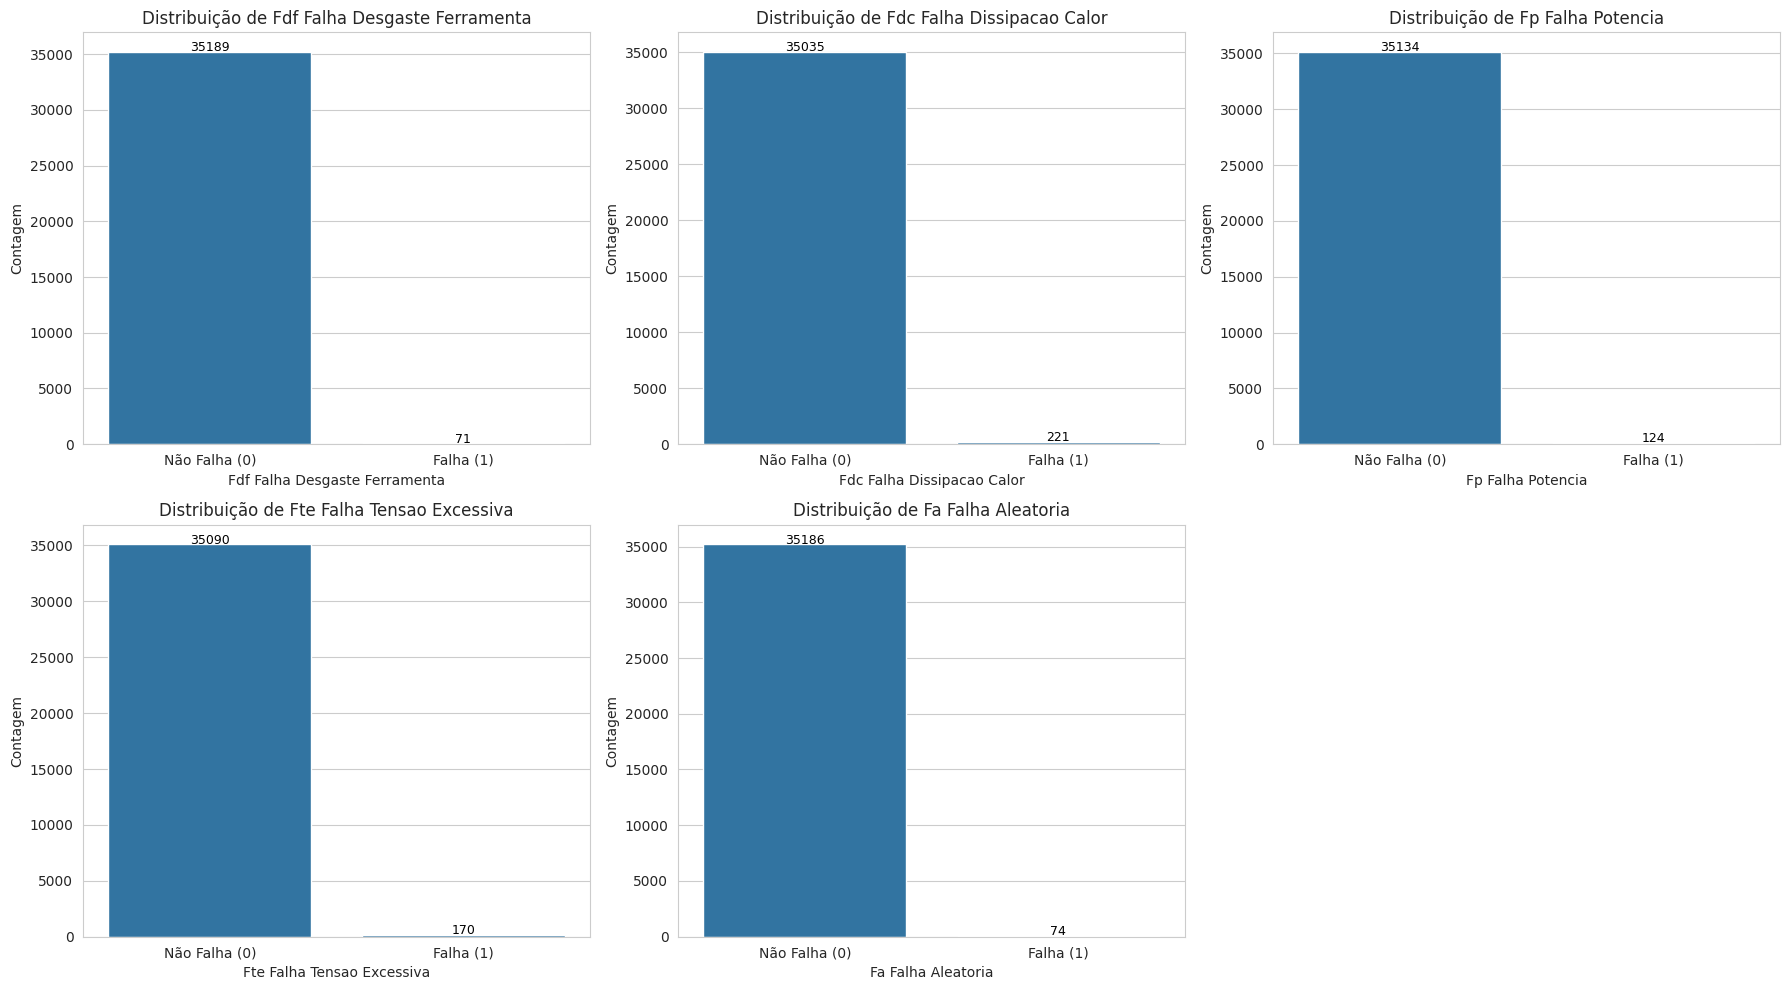


Comentário: Os gráficos de barras confirmam o desbalanceamento extremo. O número de casos de 'Não Falha' é significativamente maior do que os casos de 'Falha' para todos os tipos de falha.
--------------------------------------------------


In [ ]:
# Gráficos de barras para visualizar o desbalanceamento de cada tipo de falha individualmente
failure_cols_binary = [
    'fdf_falha_desgaste_ferramenta', 'fdc_falha_dissipacao_calor',
    'fp_falha_potencia', 'fte_falha_tensao_excessiva', 'fa_falha_aleatoria'
]

print("\nVisualizando o desbalanceamento de cada tipo de falha:")

# Determine the number of rows and columns for subplots
n_cols = 3  # You can adjust this number based on how many columns you want
n_rows = (len(failure_cols_binary) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 5)) # Adjust figure size based on number of plots

for i, col in enumerate(failure_cols_binary):
    plt.subplot(n_rows, n_cols, i + 1) # Create subplot
    ax = sns.countplot(x=df_cleaned[col])
    plt.title(f'Distribuição de {col.replace("_", " ").title()}', fontsize=12)
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Contagem')
    plt.xticks([0, 1], ['Não Falha (0)', 'Falha (1)'])

    # Add count labels on bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 3),
                    textcoords='offset points')

plt.tight_layout()
# plot_filename = f"analise_exploratoria_plots/desbalanceamento_todos.png"
# plt.savefig(plot_filename)
# print(f"Gráfico salvo em: {plot_filename}")
plt.show()
# plt.close()


print("\nComentário: Os gráficos de barras confirmam o desbalanceamento extremo. O número de casos de 'Não Falha' é significativamente maior do que os casos de 'Falha' para todos os tipos de falha.")
print("-" * 50)


Iniciando a Etapa 5: Análise da Variável Alvo...
Contagem e Porcentagem de Cada Tipo de Falha:
                               Contagem  Porcentagem (%)
fdc_falha_dissipacao_calor        221.0         0.626773
fte_falha_tensao_excessiva        170.0         0.482133
fp_falha_potencia                 124.0         0.351673
fa_falha_aleatoria                 74.0         0.209870
fdf_falha_desgaste_ferramenta      71.0         0.201361


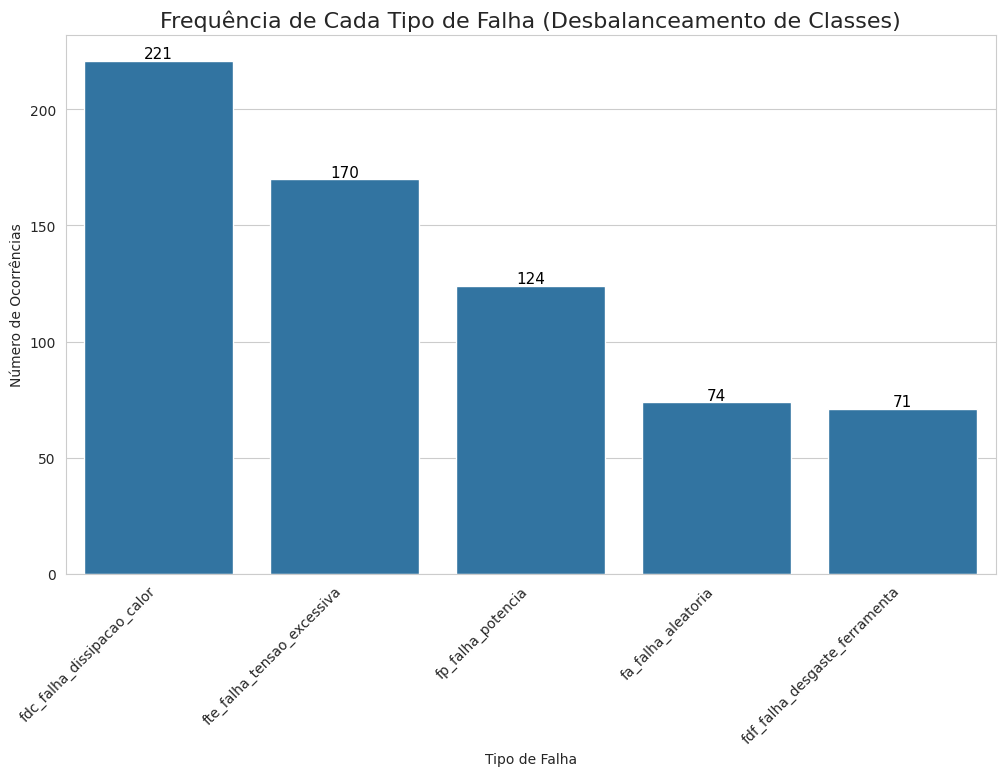

--------------------------------------------------

Comentário: Severo desbalanceamento de classes com predominância massiva de operações sem falha (98% dos casos) versus apenas 2% de falhas distribuídas em 5 tipos distintos.
A falha por dissipação de calor é a mais frequente (221 casos), seguida por tensão excessiva (170) e falha de potência (124), enquanto falhas aleatórias e desgaste de ferramenta são menos comuns (74 e 71 casos respectivamente).
--------------------------------------------------


In [ ]:
# --- 5. ANÁLISE DA VARIÁVEL ALVO ---

print("\nIniciando a Etapa 5: Análise da Variável Alvo...")

# a) Desbalanceamento de Classes
failure_counts = df_cleaned[failure_cols[1:]].sum().sort_values(ascending=False)
failure_percentages = (failure_counts / len(df_cleaned)) * 100

print("Contagem e Porcentagem de Cada Tipo de Falha:")
print(pd.DataFrame({'Contagem': failure_counts, 'Porcentagem (%)': failure_percentages}))

# Gráfico de barras para visualizar o desbalanceamento
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=failure_counts.index, y=failure_counts.values)
plt.title('Frequência de Cada Tipo de Falha (Desbalanceamento de Classes)', fontsize=16)
plt.ylabel('Número de Ocorrências')
plt.xlabel('Tipo de Falha')
plt.xticks(rotation=45, ha='right')
# Adicionar rótulos de contagem nas barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
# plot_filename = "analise_exploratoria_plots/target_desbalanceamento_classes.png"
# plt.savefig(plot_filename)
# print(f"\nGráfico salvo em: {plot_filename}")
plt.show()
print("-" * 50)
print("\nComentário: Severo desbalanceamento de classes com predominância massiva de operações sem falha (98% dos casos) versus apenas 2% de falhas distribuídas em 5 tipos distintos.")
print("A falha por dissipação de calor é a mais frequente (221 casos), seguida por tensão excessiva (170) e falha de potência (124), enquanto falhas aleatórias e desgaste de ferramenta são menos comuns (74 e 71 casos respectivamente).")
print("-" * 50)

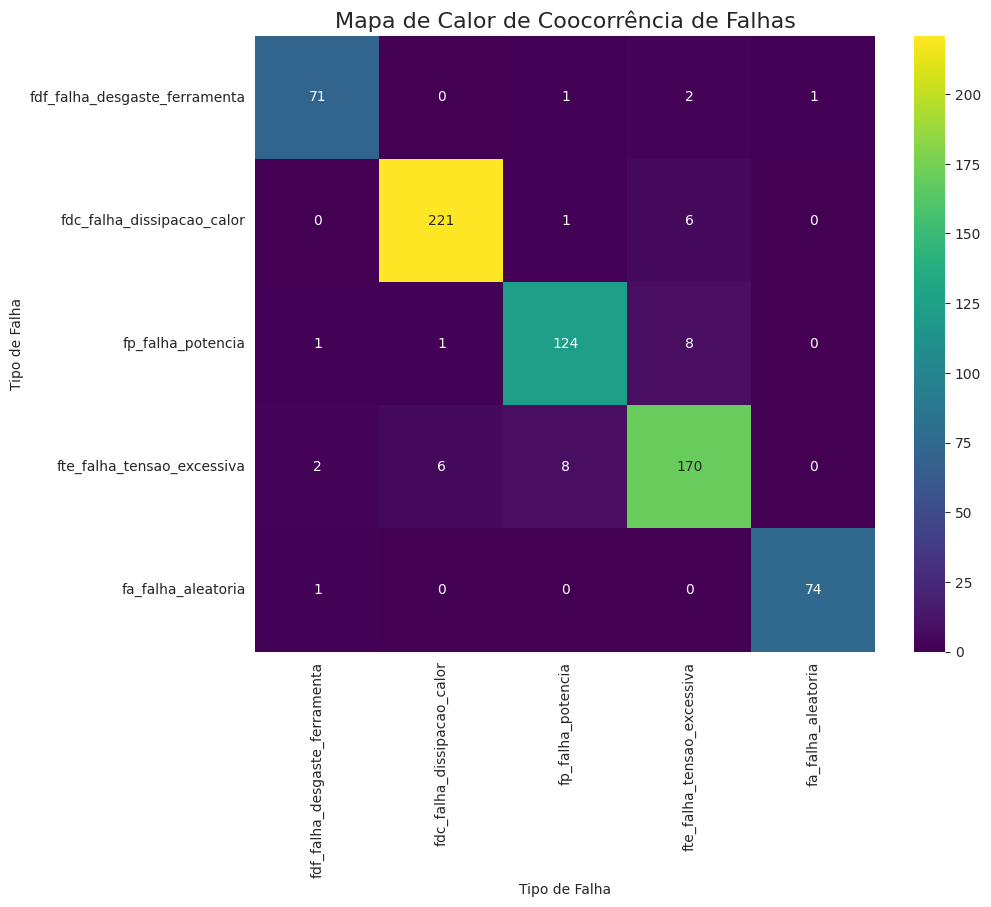


Comentário: A matriz de coocorrência mostra que, embora raras, algumas falhas ocorrem simultaneamente (ex: FDF e FP ocorreram juntas 6 vezes). Isso valida a abordagem de usar um modelo de CLASSIFICAÇÃO MULTIRRÓTULO (Multi-label Classification), pois uma única observação pode ter mais de um tipo de falha.
--------------------------------------------------


In [ ]:
# b) Coocorrência de Rótulos
# Filtrar apenas as linhas onde houve pelo menos uma falha
failures_only_df = df_cleaned[df_cleaned[failure_cols[1:]].sum(axis=1) > 0]

# Remover colunas que não são de falha para a matriz de coocorrência
cooccurrence_df = failures_only_df[failure_cols[1:]]

# Calcular a matriz de coocorrência (quantas vezes falhas ocorrem juntas)
cooccurrence_matrix = cooccurrence_df.T.dot(cooccurrence_df)

plt.figure(figsize=(10, 8))
sns.heatmap(cooccurrence_matrix, annot=True, cmap='viridis', fmt='g')
plt.title('Mapa de Calor de Coocorrência de Falhas', fontsize=16)
plt.xlabel('Tipo de Falha')
plt.ylabel('Tipo de Falha')
plot_filename = "analise_exploratoria_plots/target_coocorrencia_falhas.png"
plt.savefig(plot_filename)
plt.show()

print("\nComentário: A matriz de coocorrência mostra que, embora raras, algumas falhas ocorrem simultaneamente (ex: FDF e FP ocorreram juntas 6 vezes). Isso valida a abordagem de usar um modelo de CLASSIFICAÇÃO MULTIRRÓTULO (Multi-label Classification), pois uma única observação pode ter mais de um tipo de falha.")
print("-" * 50)



# **Conclusão Final**

O dataset revela um sistema com forte especialização de falhas, onde cada tipo de falha ocorre de forma praticamente **independente** (diagonal principal dominante no mapa de coocorrência), indicando mecanismos de falha específicos e bem definidos. As falhas aleatórias são completamente isoladas (74 casos, zero coocorrência), enquanto as demais apresentam coocorrências mínimas (< 3% de sobreposição), sugerindo que cada modo de falha tem causas raiz distintas.

Combinando com as correlações fracas entre variáveis de processo (< 0.3) e o severo desbalanceamento (~98% sem falha), o sistema caracteriza-se por múltiplos mecanismos independentes de degradação. A falha térmica (dissipação de calor, 221 casos) emerge como o modo crítico primário, seguida por tensão excessiva (170 casos) que apresenta leve correlação com falha de potência (8 coocorrências).

Implicação estratégica: *Modelos preditivos devem ser desenvolvidos com abordagem multiclasse independente, utilizando técnicas de balanceamento (SMOTE) e monitoramento especializado para cada tipo de falha, priorizando sistemas de alerta térmico e controle de tensão como as principais estratégias de manutenção preventiva, já que representam 60% de todas as falhas e operam com mecanismos distintos e previsíveis.*